**my notes**
Superivised Learning  
Classification: predicting Class Labels  
Prediction: predicting the values

Size of the data: if data is too large, only sample a small portion (especially with SVM)  
What is large? Depends on your machine and model. 

What if data set is unbalanced or data very small?  
Bagging and pasting - pick same samples several times from the smaller class. 

Who are you reporting to?   
No background: lots of detailed questions about the model- may want to pick white box model


Tune Models: have to learn paramaters  
EDA: exploratory data analysis  - get sense of the data before picking model

Elbow function: k nearest neighbor. 

Tune several hyperparameters together: grid search to find best combination. 

Ask domain expert- save a lot of time.   
**End.**

## Feature Engineering

Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.

In a data science project, you have make a lot of devisions to make:
- selecting modles
    - supervised/unsupervised
    - classification/prediction
    - size of the data
    - who you are reporting to
    - use your domain knowledge (and intuition as well)
- tuning parameters
    - EDA
    - elbow funciton
    - grid search
    - advices from the domain expert

### Discuss: what can you do if your have built a model, but your client is not satisfied with the performance?

"feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success..."

The features in your data will directly influence the predictive models you use and the results you can achieve.

### Discuss: what are feature engineering method(s) we have already learned?

<font color='red'>
- Try different models then try feature engineering   
- pick top two features = recursive feature elimination
</font>

### 1) Feature evaluation

Statistical tests can be used to select those features that have the strongest relationship with the output variable. This is usually more useful when we are dealing with datasets with many features (e.g., when we are applying bag-of-words in text classification).

The scikit-learn library provides the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest">SelectKBest</a> class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi squared (chi^2) statistical test for non-negative features to select 4 of the best features from the Pima Indians onset of diabetes dataset.

In [1]:
# load packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest #how features evaluated is chi2
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')



In [2]:
# load data
#all numeric class is just 0 or 1
file_path = "datasets/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(file_path, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
array = dataframe.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [7]:
X = array[:,0:8] #
Y = array[:,8]
print(X) #separate into x and y
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [8]:
# feature extraction
k_best_features = SelectKBest(score_func=chi2, k=4) #use chi2 to evaluate those features
fit = k_best_features.fit(X, Y) #fit best features to X and Y
fit

SelectKBest(k=4, score_func=<function chi2 at 0x000001FEB57207B8>)

In [9]:
# summarize scores
np.set_printoptions(precision=3) #specify number of digits in precision
print(fit.scores_) #scores of the features
print(names) #names of those features 

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']


In [10]:
# Let's zip the column name and the scores together to see the scores better:

feature_weights = dict(zip(names, fit.scores_)) #dict zip them together, feature if keys. Values are scores. 
feature_weights

# So it seems that most important 4 features are test, plas, age, mass

{'preg': 111.51969063588255,
 'plas': 1411.887040644141,
 'pres': 17.605373215320718,
 'skin': 53.10803983632434,
 'test': 2175.5652729220137,
 'mass': 127.66934333103606,
 'pedi': 5.39268154697145,
 'age': 181.30368904430023}

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): plas, test, mass and age.

In [11]:
selected_features = fit.transform(X) #only keep top four features from trained/fitted SelectKbBest 
# summarize selected features
print(selected_features[0:5,:])

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


**Baseline**: using all the features

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.30, 
                                                    random_state=100)

In [15]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       150
         1.0       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[129  21]
 [ 38  43]]


New model on **selected features**:

In [18]:
X_train_ft_sel, X_test_ft_sel, y_train_ft_sel, y_test_ft_sel = train_test_split(selected_features, 
                                                    Y, test_size=0.30, 
                                                    random_state=100)
#selected_features with only four features

In [19]:
# create another logistic regression model for the new training/testing dataset
logmodel_ft_sel = LogisticRegression()
logmodel_ft_sel.fit(X_train_ft_sel,y_train_ft_sel)
predictions_ft_sel = logmodel_ft_sel.predict(X_test_ft_sel)

In [20]:
print(classification_report(y_test_ft_sel,predictions_ft_sel))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       150
         1.0       0.68      0.57      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



In [21]:
print(confusion_matrix(y_test_ft_sel,predictions_ft_sel))
#only with four features, performance with only four features is better 

[[128  22]
 [ 35  46]]


We dropped half of the features in the dataset, yet the performance of our model did not drop at all!

### 2) Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the RFE class in the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE">scikit-learn documentation</a>.

The example below uses RFE with the logistic regression algorithm to select the top 4 features. 

My notes: RFE tries to eleminate each feature in the first round. End up with N-1 features.  
Then second round, try to drop each feature once. Depending on result, try to drop second feature.... 

In [22]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 4) #only want to keep four features
fit_rfe = rfe.fit(X, Y)
print(("Num Features: %d") % fit_rfe.n_features_)
print(("Selected Features: %s") % fit_rfe.support_) #give you trues/falses
print(("Feature Ranking: %s") % fit_rfe.ranking_) #gives four 1's: this is the four we keep, 2: second one dropped...

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 2 4 5 1 1 3]


In [24]:
feature_weights_RFE = dict(zip(names, fit_rfe.ranking_))
feature_weights_RFE

# RFE suggests that the most important 4 features are mass, pedi, plas, preg
#put names and rankings together

{'preg': 1,
 'plas': 1,
 'pres': 2,
 'skin': 4,
 'test': 5,
 'mass': 1,
 'pedi': 1,
 'age': 3}

When we did feature evaluation, the most important 4 features are 
- test
- plas
- age
- mass

But RFE says the most important 4 features are
- mass
- pedi 
- plas 
- preg

In [26]:
selected_features = fit_rfe.transform(X) #transform data, only have four columns
# summarize selected features
print(selected_features[0:5,:])

[[6.000e+00 1.480e+02 3.360e+01 6.270e-01]
 [1.000e+00 8.500e+01 2.660e+01 3.510e-01]
 [8.000e+00 1.830e+02 2.330e+01 6.720e-01]
 [1.000e+00 8.900e+01 2.810e+01 1.670e-01]
 [0.000e+00 1.370e+02 4.310e+01 2.288e+00]]


In [27]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(selected_features, 
                                                    Y, test_size=0.30, 
                                                    random_state=100)

In [28]:
# create another logistic regression model for the new training/testing dataset
logmodel_rfe = LogisticRegression()
logmodel_rfe.fit(X_train_rfe,y_train_rfe)
predictions_rfe = logmodel_rfe.predict(X_test_rfe)

In [29]:
print(classification_report(y_test_rfe,predictions_rfe))

              precision    recall  f1-score   support

         0.0       0.78      0.88      0.82       150
         1.0       0.70      0.53      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [30]:
print(confusion_matrix(y_test_rfe,predictions_rfe))
#This confusion matrix is slightly better then SelectKBest

[[132  18]
 [ 38  43]]


See also: the RFE part of the lecture notes 15. 

### Discuss, what is the most important difference between RFE and SelectKBest?

Why do we have different top four features for RFE and SelectKBest? If you have to make decision which do you trust?  
SelectKBest= STATIC feature selection. We didn't specify which ML we use, didn't run any.   
RFE: have to give it a ML model. If we have decided we are using logreg, then we go ahead and send that to RFE.  RFE evaluates features using the model you are going to use. 


If you haven't decided which ML model you are going to use, but want to have an idea as to what features are going to be more important, then go ahead and use SelectKBest
### Exercise: introduce a noise feature in the diabetes data, then try both RFE and SelectKBest.

In [31]:
file_path = "datasets/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(file_path, names=names)

In [32]:
# check the shape of the dataframe
dataframe.shape

(768, 9)

In [33]:
# Create an np array of random integers between 0 and 100, name it noise_values
# use np.random.randint
noise_values=np.random.randint(0,101,768)

In [34]:
# add a new column "noise" to the dataframe
dataframe['noise'] = noise_values
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class,noise
0,6,148,72,35,0,33.6,0.627,50,1,45
1,1,85,66,29,0,26.6,0.351,31,0,85
2,8,183,64,0,0,23.3,0.672,32,1,83
3,1,89,66,23,94,28.1,0.167,21,0,31
4,0,137,40,35,168,43.1,2.288,33,1,40


In [35]:
# Create a new list of features (excluding "class")
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'noise']
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'noise']

In [36]:
# Separate X (features) and y (labels)
X=dataframe.drop(columns=['class']) #separate x and y
y=dataframe['class']

In [37]:
# Check the head of X
X.head()

,preg,plas,pres,skin,test,mass,pedi,age,noise
0,6,148,72,35,0,33.6,0.627,50,45
1,1,85,66,29,0,26.6,0.351,31,85
2,8,183,64,0,0,23.3,0.672,32,83
3,1,89,66,23,94,28.1,0.167,21,31
4,0,137,40,35,168,43.1,2.288,33,40


In [39]:
# check y
#y

In [40]:
# feature extraction: use SelectKBest to select top 4 features with chi2
# feature extraction
k_best_features = SelectKBest(score_func=chi2, k=4) #use chi2 to evaluate those features
fit = k_best_features.fit(X, y) #fit best features to X and Y
fit

SelectKBest(k=4, score_func=<function chi2 at 0x000001FEB57207B8>)

In [41]:
# Show the weights from SelectKBest
np.set_printoptions(precision=3) #specify number of digits in precision

#print(fit.scores_) #scores of the features
#print(names) #names of those features 

feature_weights = dict(zip(names, fit.scores_)) #dict zip them together, feature if keys. Values are scores. 
feature_weights

#noise not the worst, but low value

{'preg': 111.51969063588255,
 'plas': 1411.887040644141,
 'pres': 17.605373215320718,
 'skin': 53.10803983632434,
 'test': 2175.5652729220137,
 'mass': 127.66934333103606,
 'pedi': 5.39268154697145,
 'age': 181.30368904430023,
 'noise': 64.95622260187338}

In [42]:
# RFE: create a LogisticRegression model, then use RFE to select the top 4 features
model = LogisticRegression()
rfe = RFE(model, 4) #only want to keep four features
fit_rfe = rfe.fit(X, y)

In [43]:
# Show the features and their ranks
feature_weights_RFE = dict(zip(names, fit_rfe.ranking_))
feature_weights_RFE

{'preg': 1,
 'plas': 1,
 'pres': 2,
 'skin': 4,
 'test': 6,
 'mass': 1,
 'pedi': 1,
 'age': 3,
 'noise': 5}

If you are "lucky", the "noise" feature may *not* be the worst feature. =)  
Sometimes features with random values are not the worst feature

Add noise to existing feature- can drastically change performance of ML model 

Feature engineering- if there are noise features, they will hurt performance and not help, so get rid of them

### 3) Handling NANs

#### The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

<table>
<tr><td>Variable	<td>Definition	<td>Key

<tr><td>survival	<td>Survival	<td>0 = No, 1 = Yes
<tr><td>pclass	<td>Ticket class	<td>1 = 1st, 2 = 2nd, 3 = 3rd
<tr><td>sex	<td>Sex	
<tr><td>Age	<td>Age in years	
<tr><td>sibsp	<td># of siblings / spouses aboard the Titanic	
<tr><td>parch	<td># of parents / children aboard the Titanic	
<tr><td>ticket	<td>Ticket number	
<tr><td>fare	<td>Passenger fare	
<tr><td>cabin	<td>Cabin number	
<tr><td>embarked	<td>Port of Embarkation	<td>C = Cherbourg, Q = Queenstown, S = Southampton
</table>

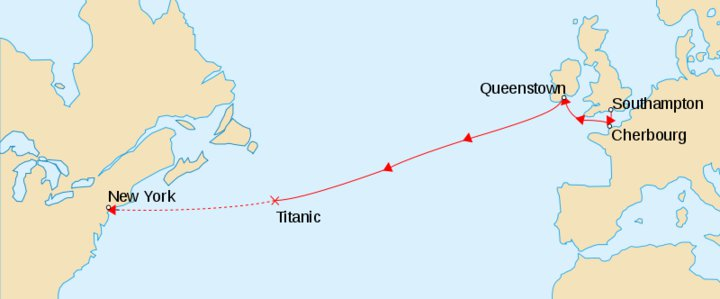

In [60]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('datasets/titanic_train.csv')

We can see some "NaN"s in the Cabin column:

In [61]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df_train.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Visualizing the Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

If we use isnull() function, a True/False matrix will be produced, but not very readable.

In [63]:
df_train.isnull().head() #have a matrix of true and false

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


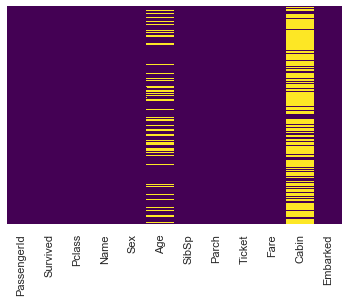

In [64]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #visualize true and false
#yellow is NAN in age and cabin. 
#lots missing in Cabin, a few for age. 

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

#### Filling in Missing Data
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


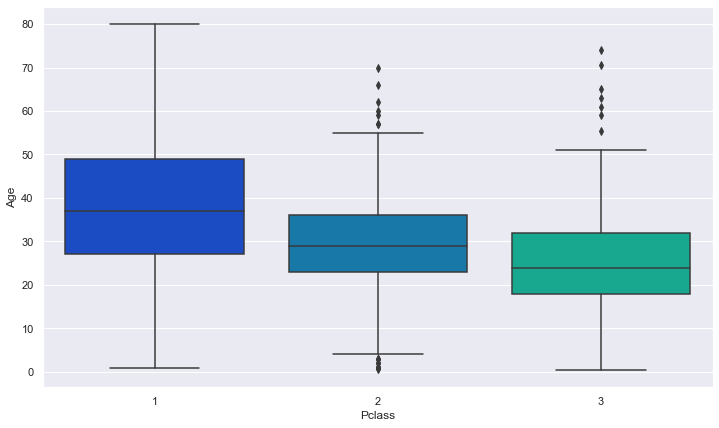

In [49]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Instead of replacing all the missing ages with the same age, we want to replace the average age based on the class. 

In [65]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now **apply** that function!

In [66]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1) #now apply this function and replace the values

Now let's check that heat map again!

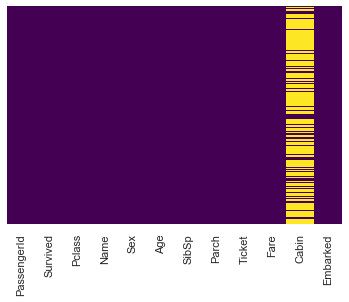

In [67]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #age fixed

Great! Let's go ahead and drop the Cabin column. This column has many missing values...

In [69]:
df_train.drop('Cabin',axis=1,inplace=True)
#don't think cabin is super important feature
#so many missing, so throw it away

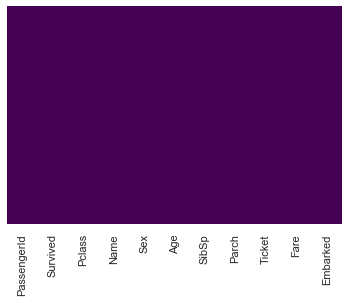

In [70]:
# check to see whether there is more records with missing values
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #all fixed

In [55]:
# there are two more rows with NaN on the "embarked" column
df_train[df_train.Embarked.isnull()] #find two more 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [71]:
df_train.dropna(inplace = True) #just throw those away
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


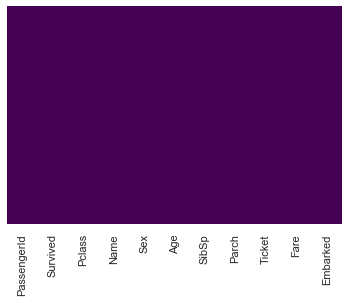

In [72]:
# check to see whether there is more records with missing values
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 4) Extracting features from existing ones

We'll be trying to predict a classification- survival or deceased.

Let's begin our understanding of implementing Logistic Regression in Python for classification.


In [58]:

df_test = pd.read_csv('datasets/titanic_test.csv')

# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

# View head
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,NaN,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,NaN,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450


#### Why extract more features?

You perform feature engineering to extract more information from your data, so that you can "up your game" when building models.

#### Titanic's Passenger Titles
Let's check out what this is all about by looking at an example. Let's check out the 'Name' column:

In [18]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

You see different titles emerging! In other words, this column contains strings or text that contain titles, such as 'Mr', 'Master' and 'Dona'.

These titles of course give you information on social status, profession, etc., which in the end could tell you something more about survival.

At first sight, it might seem like a difficult task to separate the names from the titles, but don't panic! Remember, you can easily use regular expressions to extract the title and store it in a new column 'Title':

In [73]:
# Extract Title from Name, store in column and plot barplot
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) #find titles with this pattern
data['Title'] #new column called title

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 1307, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

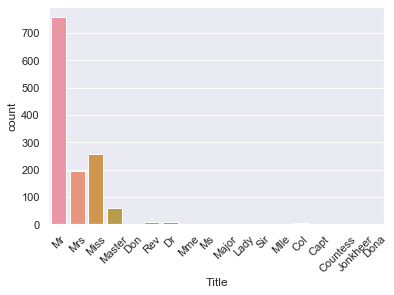

In [74]:
g = sns.countplot(x='Title', data=data,)
plt.xticks(rotation=45) #count the titles

This new column 'Title' is actually a **new feature** for our data set!

You can see that there are several titles in the above plot and there are many that don't occur so often. So, it makes sense to put them in fewer buckets.

For example, you probably want to replace 'Mlle' and 'Ms' with 'Miss' and 'Mme' by 'Mrs', as these are French titles and ideally, you want all your data to be in one language. Next, you also take a bunch of titles that you can't immediately categorize and put them in a bucket called 'Special'.

Next, you view a barplot of the result with the help of the .countplot() method:

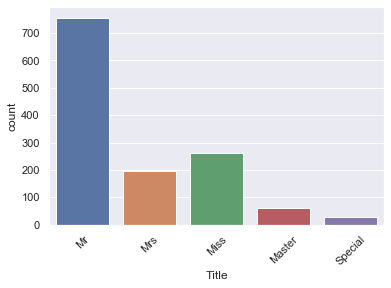

In [75]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'}) #all these are miss in diff languages
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special') #only a few or only one occurrence 
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

Now, make sure that you have a 'Title' column and check out your data again .


In [76]:
data.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr
1,38.0,NaN,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss
3,35.0,NaN,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr
5,24.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,330877,Mr
6,54.0,NaN,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,17463,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,349909,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,347742,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,237736,Mrs


In [77]:
# we should see a "Special" on the "Title" column on line 414
data.tail(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
398,22.0,NaN,S,7.7750,"Larsson-Rondberg, Mr. Edvard A",0,1290,3,male,0,347065,Mr
399,31.0,NaN,Q,7.7333,"Conlon, Mr. Thomas Henry",0,1291,3,male,0,21332,Mr
400,30.0,C7,S,164.8667,"Bonnell, Miss. Caroline",0,1292,1,female,0,36928,Miss
401,38.0,NaN,S,21.0000,"Gale, Mr. Harry",0,1293,2,male,1,28664,Mr
402,22.0,NaN,C,59.4000,"Gibson, Miss. Dorothy Winifred",1,1294,1,female,0,112378,Miss
403,17.0,NaN,S,47.1000,"Carrau, Mr. Jose Pedro",0,1295,1,male,0,113059,Mr
404,43.0,D40,C,27.7208,"Frauenthal, Mr. Isaac Gerald",0,1296,1,male,1,17765,Mr
405,20.0,D38,C,13.8625,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,1297,2,male,0,SC/PARIS 2166,Mr
406,23.0,NaN,S,10.5000,"Ware, Mr. William Jeffery",0,1298,2,male,1,28666,Mr
407,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1299,1,male,1,113503,Mr


## Discuss: is there any more feature engineering ideas you would like to try on the Titanic dataset if we are planning to use Logistic Regression?
<font color='red'>
 
- Passenger ID: what do with that?  
-if you suspect passenger ID is not useful, do feature importance first before throw it away

-Ticket Numer: maybe not that important. 

-Fare: correlated to P.Class  
-If you have two features which are highly correlated can you drop one of them?


</font>

### To sum up:
- feature evaluation:
    - to choose the best few of features
        - careful: some features can be corelated
- dealing with NaNs:
    - filling them with *reasonable* values
    - dropping the records which contains NaNs (if there are not many)
- extracting new features